In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
cur_dir = os.getcwd()
path = os.path.join(cur_dir,'dataset','train.csv')
path

'/data1/home/feynman52/ntu-ml/hw5/dataset/train.csv'

In [3]:
df_train = pd.read_csv( os.path.join(cur_dir,'dataset','train.csv'), sep=',' )
df_movies = pd.read_csv( os.path.join(cur_dir,'dataset','movies.csv'), sep='::' )
df_users = pd.read_csv( os.path.join(cur_dir,'dataset','users.csv'), sep='::' )
df_test = pd.read_csv( os.path.join(cur_dir,'dataset','test.csv'), sep=',' )
df_SampleSubmisson = pd.read_csv( os.path.join(cur_dir,'dataset','SampleSubmisson.csv'), sep=',' )

/data1/home/feynman52/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/data1/home/feynman52/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
mean = df_train.Rating.mean()
std = df_train.Rating.std()
df_train['Rating_normalized'] = (df_train['Rating'] - mean)/std


In [5]:
all_user = np.concatenate([df_train.UserID,df_test.UserID],axis=0)
all_movie = np.concatenate([df_train.MovieID,df_test.MovieID],axis=0)
print(all_user.shape)
print(all_movie.shape)
all_user = np.unique(all_user)
all_movie = np.unique(all_movie)
print(all_user.shape)
print(all_movie.shape)


(1000209,)
(1000209,)
(6040,)
(3706,)


In [6]:
df_all_movie = pd.DataFrame({'movie_id':all_movie})
df_all_movie['movie_index'] = df_all_movie.index

df_all_user = pd.DataFrame({'user_id':all_user})
df_all_user['user_index'] = df_all_user.index


In [7]:
movie_id_to_index = df_all_movie.set_index('movie_id').to_dict()
movie_id_to_index = movie_id_to_index['movie_index']
user_id_to_index = df_all_user.set_index('user_id').to_dict()
user_id_to_index = user_id_to_index['user_index']
movie_id_to_index[3952]

3705

In [8]:
df_train['user_index'] =  df_train.apply(lambda row: user_id_to_index[row.UserID] ,axis=1)
df_train['movie_index'] =  df_train.apply(lambda row: movie_id_to_index[row.MovieID] ,axis=1)

df_train

,TrainDataID,UserID,MovieID,Rating,Rating_normalized,user_index,movie_index
0,1,796,1193,5,1.269845,795,1104
1,2,796,661,3,-0.520828,795,639
2,3,796,914,3,-0.520828,795,853
3,4,796,3408,4,0.374509,795,3177
4,5,796,2355,5,1.269845,795,2162
5,6,796,1197,3,-0.520828,795,1107
6,7,796,1287,5,1.269845,795,1195
7,8,796,2804,5,1.269845,795,2599
8,9,796,919,4,0.374509,795,858
9,10,796,595,5,1.269845,795,581


In [9]:
user_train = df_train.user_index
movie_train = df_train.movie_index
rating_train = df_train.Rating

In [28]:
user_train.shape

(899873,)

# different laten dimension, w/o normalization

In [10]:
n_users= len(user_train)
n_movies= len(movie_train)


In [20]:
from keras.layers import Input, Dense, Embedding, Flatten, dot
from keras.models import Model
from keras.utils import get_custom_objects
import keras.backend as K
from sklearn.utils import shuffle
import matplotlib.pylab as plt

In [25]:
def my_model(latent_dim):

    # build model---------------------------------------------------------
    user_input = Input(shape=(1,))
    movie_input = Input(shape=(1,))

    user_vecter = Embedding(n_users, latent_dim, embeddings_initializer="random_normal")(user_input)
    user_vecter = Flatten()(user_vecter)

    movie_vecter = Embedding(n_movies, latent_dim, embeddings_initializer="random_normal")(movie_input)
    movie_vecter = Flatten()(movie_vecter)


    rating_predict = dot([user_vecter,movie_vecter],axes=1)

    model = Model([user_input,movie_input],rating_predict)

    # compile model---------------------------------------------------------
    def rmse(y_true, y_pred):
        y_pred = K.clip(y_pred, 1.0, 5.0)
        return K.sqrt(K.mean(K.pow(y_true - y_pred, 2)))
    get_custom_objects().update({"rmse": rmse})

    model.compile(loss="mse", optimizer="adam", metrics=[rmse])

    model.summary()

    # fit model---------------------------------------------------------
    batch_size=1000
    epochs = 10

    user_train2, movie_train2, rating_train2 = shuffle(user_train, movie_train, rating_train)


    history = model.fit([user_train2, movie_train2],
                        rating_train2,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.1,
                        shuffle=True)
    
    # plot
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    
    

-----------------------------------10-----------------------------------
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 1, 10)        8998730     input_21[0][0]                   
__________________________________________________________________________________________________
embedding_22 (Embedding)        (None, 1, 10)        8998730     input_22[0][0]                   
____________________________________

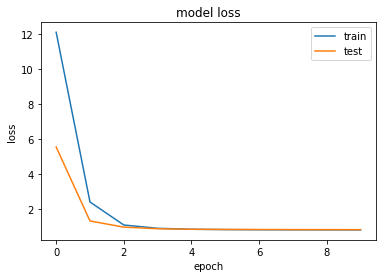

-----------------------------------20-----------------------------------
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_23 (Embedding)        (None, 1, 20)        17997460    input_23[0][0]                   
__________________________________________________________________________________________________
embedding_24 (Embedding)        (None, 1, 20)        17997460    input_24[0][0]                   
____________________________________

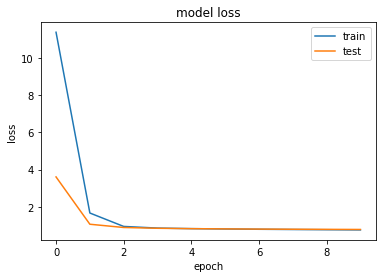

-----------------------------------30-----------------------------------
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_26 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_25 (Embedding)        (None, 1, 30)        26996190    input_25[0][0]                   
__________________________________________________________________________________________________
embedding_26 (Embedding)        (None, 1, 30)        26996190    input_26[0][0]                   
____________________________________

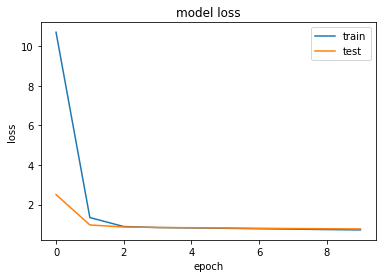

In [26]:
for latent_dim in [10,20,30]:
    print('----------------------------------------------------------------------')
    print('-----------------------------------%s-----------------------------------'%(latent_dim))
    my_model(latent_dim)
    
    
    
    